### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

import warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
py.offline.init_notebook_mode(connected = True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Importing the Dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")


* **Let's get some info.**

In [3]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Cleaning

* **Determine the data types and missing value.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* **There are some missing value in income column**
* **Dt_Customer column need to process**
* **There are  3 categorical columns.**


### Deleting rows with missing values


In [5]:
df.dropna(inplace = True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

* **Let's create a column that shows how many days customers have been registered with the company.**
>* We need to oldest customer and newest customer.

In [7]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print("Registration date of the newest customer on record:",max(dates))
print("Registration date of the oldest customer on record:",min(dates))


Registration date of the newest customer on record: 2014-12-06
Registration date of the oldest customer on record: 2012-01-08


* **Let's open a new column called customer for.**

In [8]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")


* **We look for unique values in columns that are categorical.**

In [9]:
print("Unique value in Martial Status\n", df["Marital_Status"].value_counts(), "\n")
print("Unique value in Education\n", df["Education"].value_counts())


Unique value in Martial Status
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Unique value in Education
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### We perform label encode operation by changing the labels of unique values because there are many columns.

* Married : Partner
* Together : Partner
* Absurd : Alone
* Widow : Alone
* YOLO : Alone
* Single : Alone

* 
* Basic : Undergraduate
* 2n Cycle : Undergraduate
* Graduatition : Graduate
* Master : Graduate
* PhD : Graduate

### Feature Engineering
* Customer age

In [10]:
df["Age"] = 2021-df["Year_Birth"]


* Miscellaneous expenses

In [11]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

* Determination of whether the client has a partner based on marital status.

In [12]:
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

* Total number of children living at home

In [13]:
df["Children"] = df["Kidhome"] + df["Teenhome"]


* Total person at family

In [14]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]


* Parentage status

In [15]:
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)


* Division of education status

In [16]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Graduate", "PhD":"Graduate"})

* Editing some column names

In [17]:
df = df.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

* Z_CostContact and Z_Revenue have fixed value. We exclude them from the dataset because they are unnecessary.

In [18]:
df.Z_CostContact.describe()

count    2216.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [19]:
df.Z_Revenue.describe()

count    2216.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

In [20]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

* **Converting categorical value to numerical value**

In [21]:
le = LabelEncoder()
df['Education'] = df[['Education']].apply(le.fit_transform)
df['Living_With'] = df[['Living_With']].apply(le.fit_transform)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [23]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,1,1,3,1
4,0,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,54,1341,1,1,3,1
2236,0,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,75,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,40,1241,0,0,1,0
2238,0,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,65,843,1,1,3,1


* **PairPlot**

**Pairplot plots pairwise relationships in a dataset. creates a grid of Axes such that each variable in the data is shared along the y-axis along a single row and on the x-axis along a single column.**

<Figure size 432x288 with 0 Axes>

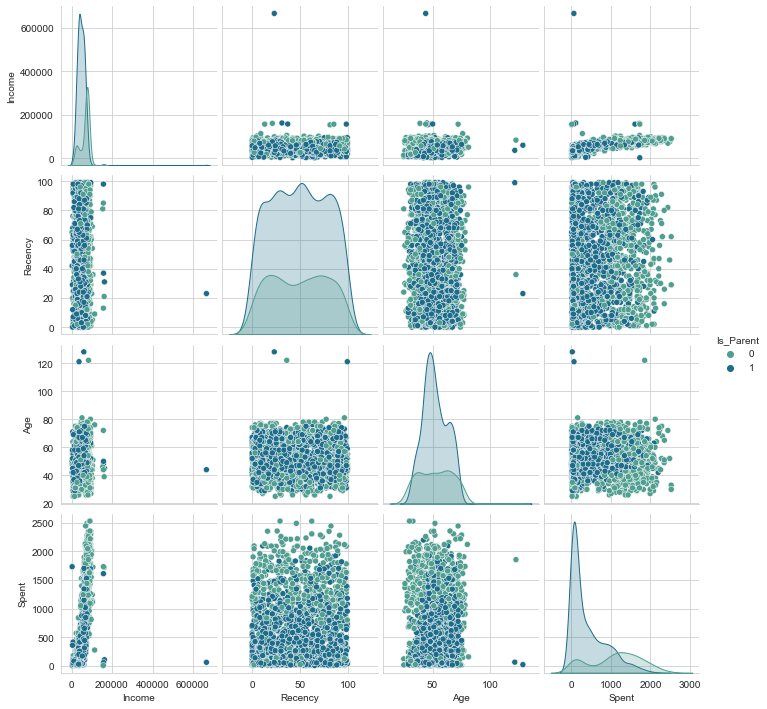

In [24]:
sns.set_style("whitegrid")
plt.figure()
sns.pairplot(df[["Income", "Recency", "Age", "Spent", "Is_Parent"]], hue='Is_Parent', palette='crest')
plt.show()


 * **Basic statistical details**
>> * **df.describe()**
>* count:  Sum of filled values
>* mean:   Average value
>* std:    Standard deviation
>* min:    Minimum value
>* %25:    %25 quantil*
>* %50:    %50 quantil*
>* %75:    %75 quantil*
>* max:    Maximum value

In [25]:
df.describe()


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.114621,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.645307,0.947202,2.592509,0.714350
std,0.318636,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,1.000000,3.000000,1.000000
75%,0.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


##  **Outlier Detection**

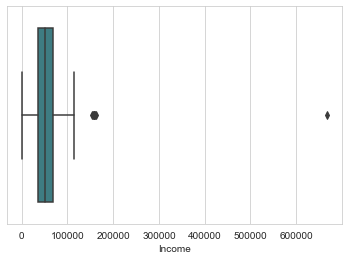

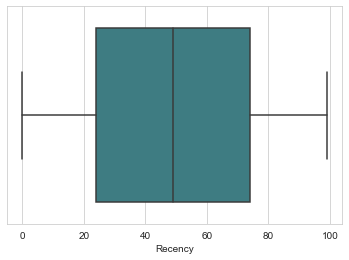

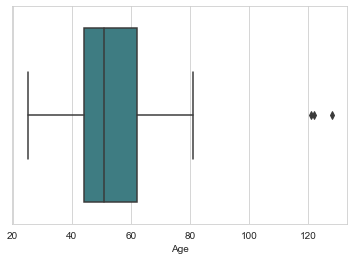

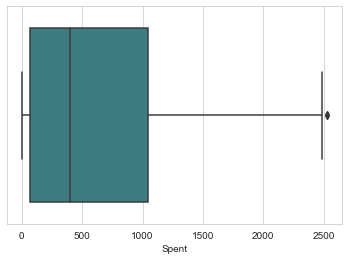

In [26]:
personal = ["Income", "Recency", "Age", "Spent"]


for i in personal:
    plt.figure()
    sns.boxplot(x=df[i], palette='crest')
    plt.show()
    

**Inter Quantile Range**
* We will use the IQR method to detect outlier data.
* First of all, it is necessary to find the distance between the quartiles in the data. (IQR = Q3 - Q1) 

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/Interquartile-Odd.png?raw=true)


* **Then we will perform Q1-1.5xIQR and Q3+1.5xIQR transactions to determine the IQR limits.**
>* **The fixed value used during the determination of the limits changes according to the state of the data.**

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/iqr.jpeg?raw=true)

In [27]:
df['Age'].quantile(0.25)


44.0

In [28]:
df['Age'].quantile(0.75)

62.0

* **Then IQR limits are determined.**

In [29]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
IQR

18.0

In [31]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

#The fixed value used during the determination of the limits changes according to the state of the data.

In [32]:
lower_lim

17.0

In [33]:
upper_lim

89.0

* **Extraction of outlier data from the dataset.**

In [34]:
outliers_low = (df['Age'] < lower_lim)

In [35]:
outliers_up = (df['Age'] > upper_lim)

In [36]:
len(df['Age'] - (len(df['Age'][outliers_low] + len(df['Age'][outliers_up]))))

2216

In [37]:
df['Age'][(outliers_low | outliers_up)]

192    121
239    128
339    122
Name: Age, dtype: int64

In [38]:
df['Age'][~(outliers_low | outliers_up)]

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2213, dtype: int64

In [39]:
df = df[~(outliers_low | outliers_up)]

<AxesSubplot:xlabel='Age'>

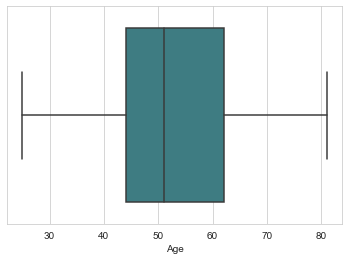

In [40]:
sns.boxplot(df.Age, palette='crest')

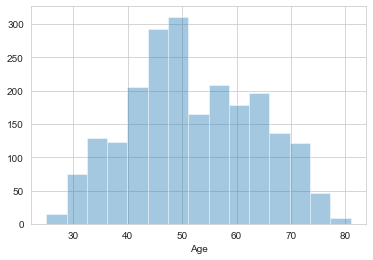

In [41]:
sns.distplot(df['Age'], bins = 15, kde = False)
plt.show()

<AxesSubplot:xlabel='Income'>

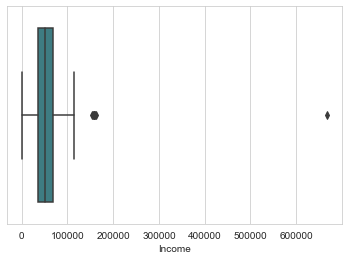

In [42]:
sns.boxplot(df.Income, palette='crest')


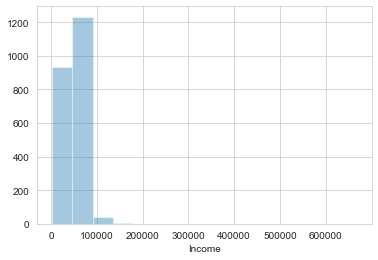

In [43]:
sns.distplot(df['Income'], bins = 15, kde = False)
plt.show()

In [44]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

outliers_low = (df['Income'] < lower_lim)
outliers_up = (df['Income'] > upper_lim)
len(df['Income'] - (len(df['Income'][outliers_low] + len(df['Income'][outliers_up]))))
df['Income'][(outliers_low | outliers_up)]
df['Income'][~(outliers_low | outliers_up)]
df = df[~(outliers_low | outliers_up)]

<AxesSubplot:xlabel='Income'>

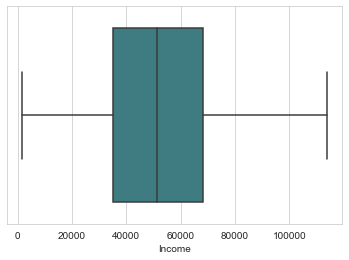

In [45]:
sns.boxplot(df.Income, palette='crest')

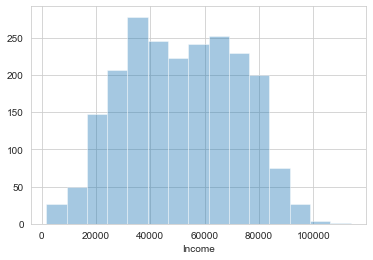

In [46]:
sns.distplot(df['Income'], bins = 15, kde = False)
plt.show()

## Correlation
* **It is a statistical method used to determine whether there is a linear relationship between two numerical measurements, and if so, the direction and severity of this relationship.**


<AxesSubplot:>

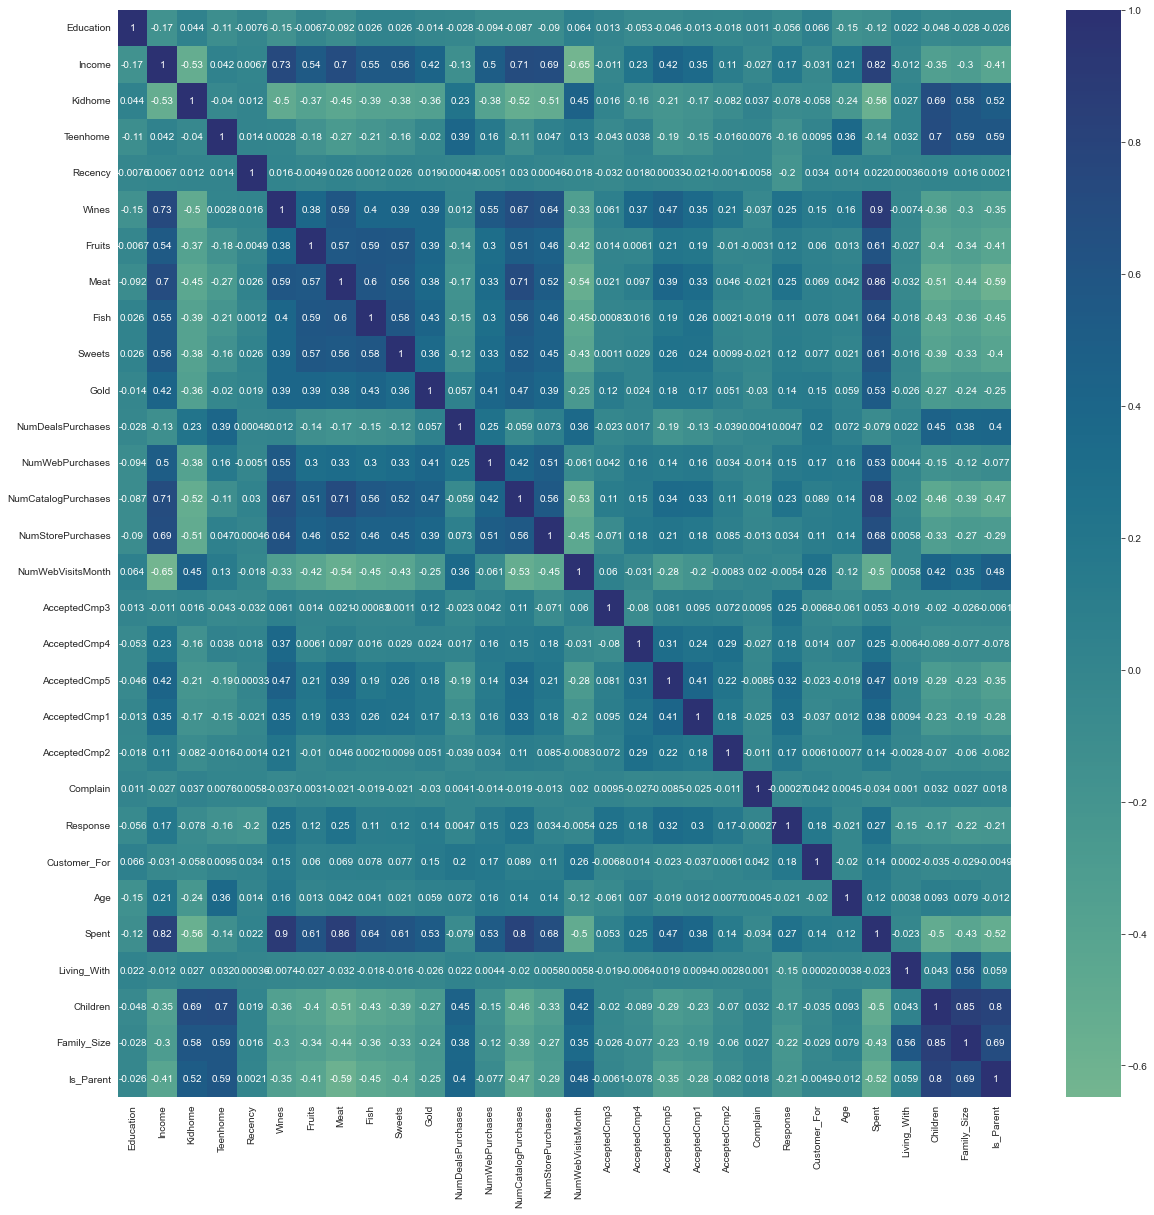

In [47]:
corrmat = df.corr()
plt.figure(figsize = (20,20))  
sns.heatmap(corrmat,annot=True, center=0, cmap='crest')

### **Data preprocessing**

* **We are removing columns related to deals and promotions from the dataset as they cause semantic confusion.**

In [48]:
new_df = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
new_df = new_df.drop(cols_del, axis=1)

*  **Scale the data**

In [49]:
sc = StandardScaler()
sc.fit(new_df)
scaled_df = pd.DataFrame(sc.transform(new_df), columns = new_df.columns )

In [50]:
scaled_df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.359211,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,2.628526,-0.562650,0.689203,1.974128,1.017189,1.679323,-1.347625,-1.266589,-1.759012,-1.58466
1,-0.359211,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-0.588043,-1.179732,-0.139645,-1.664957,1.273530,-0.963897,-1.347625,1.403420,0.448513,0.63105
2,-0.359211,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,-0.230646,1.288596,-0.554069,-0.172330,0.333612,0.281242,0.742046,-1.266589,-0.655250,-1.58466
3,-0.359211,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.945440,-0.562650,0.274779,-1.923048,-1.289883,-0.920675,0.742046,0.068415,0.448513,0.63105
4,-0.359211,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.126750,0.054432,-0.139645,-0.821859,-1.033542,-0.307248,0.742046,0.068415,0.448513,0.63105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.359211,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,...,0.126750,-0.562650,-0.139645,0.124475,0.162718,1.220500,0.742046,0.068415,0.448513,0.63105
2201,-0.359211,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,...,-0.230646,-0.254109,0.689203,-1.940254,1.957107,-0.270675,0.742046,2.738424,2.656038,0.63105
2202,-0.359211,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,...,0.126750,2.214218,0.274779,-0.847668,-1.033542,1.054260,-1.347625,-1.266589,-1.759012,-1.58466
2203,-0.359211,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,...,0.841543,1.288596,-0.968493,-0.843367,1.102636,0.392623,0.742046,0.068415,0.448513,0.63105


### **Dimension Reduction**

* **In some cases, dimension reduction is very important.**

>* **For example: improving model performance or enabling visualization.**

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/pca.png?raw=true)

**By performing this operation, we actually look at the data from a different point of view, looking at the data from a different point means that new attributes can be extracted.**

In [51]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-2.618213e-18,2.902656,-6.022531,-2.574374,-0.791579,2.432082,7.533683
col2,2205.0,5.206216e-17,1.720027,-4.536644,-1.335535,-0.159986,1.260606,6.205451
col3,2205.0,-3.504377e-17,1.233830,-3.292554,-0.824080,-0.013392,0.794761,6.289668


In [52]:
pca_df

,col1,col2,col3
0,5.024467,-0.210091,2.521244
1,-2.896486,0.047927,-2.105317
2,2.613544,-0.723680,-0.333127
3,-2.721422,-1.530116,-0.869619
4,-0.616060,0.292546,0.136662
...,...,...,...
2200,2.323872,2.367956,0.701535
2201,-3.047916,4.150083,-1.386309
2202,2.664087,-1.855833,0.193829
2203,1.566788,1.782262,-1.675796


## Image of data reduced to 3D

In [53]:
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))
trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers',marker=dict(color = 'blue', size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/3d_data.jpg?raw=true)

## Modelling

**KMeans**

**K-Means starts by randomly choosing the center point of k clusters, and the data points outside the center are included in the clusters they are similar to, according to their distance from the mean values of the clusters. Then, the average value of each cluster is calculated and new cluster centers are determined. Again, the distances of the objects from the center are examined. This process until the change is over.**

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/kmeans.png?raw=true)

* **Determination of Optimal Cluster Quantity**

**WCSS(Within Cluster Sum Of Square):**
* It is an indicator of how consistent the different cluster amounts are.
* Calculates and sums the square of the distance of each sample from the cluster center.
* The smaller the inertia value, the more consistent the different clusters will be.
* As the number of clusters increases, the WCSS value starts to decrease.
* The inertia value and the optimal number of clusters are found by the Elbow method.

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/wcss.png?raw=true)



Text(0.5, 1.0, 'Elbow Method')

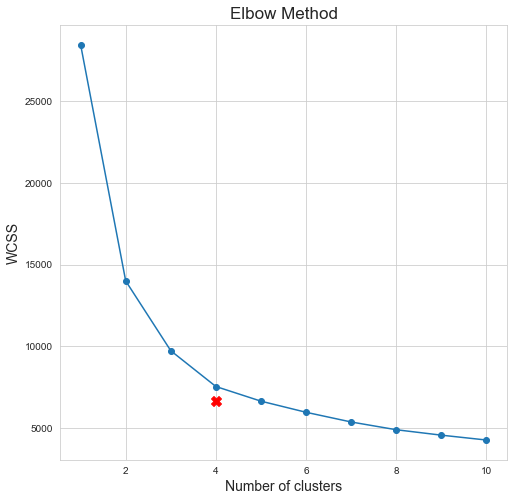

In [54]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(pca_df)
    inertia_list.append(kmeans_model.inertia_)
    
#plotting the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(4, inertia_list[4], marker="X", s=100, c="r")
plt.xlabel("Number of clusters", size=14)
plt.ylabel("WCSS", size=14)
plt.title("Elbow Method", size=17)

In [55]:
print('K-Means')
kMeans = KMeans(n_clusters = 4, init = 'k-means++') 
y_pred_kMeans = kMeans.fit_predict(pca_df)
pca_df["Clusters_KMeans"] = y_pred_kMeans
df["Clusters_KMeans"]= y_pred_kMeans
print('Pred:\n', y_pred_kMeans)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)


K-Means
Pred:
 [1 3 1 ... 1 2 3]


inertia:  7545.616739664922 

clusters centers:
 [[-2.08288371 -1.71996804  0.54967284]
 [ 4.23611673 -0.90888377 -0.20522986]
 [ 0.90528074  1.90846422  0.36304977]
 [-2.56739     0.79999694 -0.78821306]]


In [56]:
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))
trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers',marker=dict(color = pca_df["Clusters_KMeans"], size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/3d_kmeans.jpg?raw=true)

# Hierarchical Clustering

* Hierarchical clustering typically works by sequentially combining similar clusters. It has two different approaches: Agglomerative (Part to whole) and Divisive (Whole to part).

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/hierarchical.png?raw=true)

**Dendrogram**

* A dendrogram is a tree diagram of a distance matrix showing hierarchical clustering (relationships between sets of similar data).

![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/dendrogram.png?raw=true)

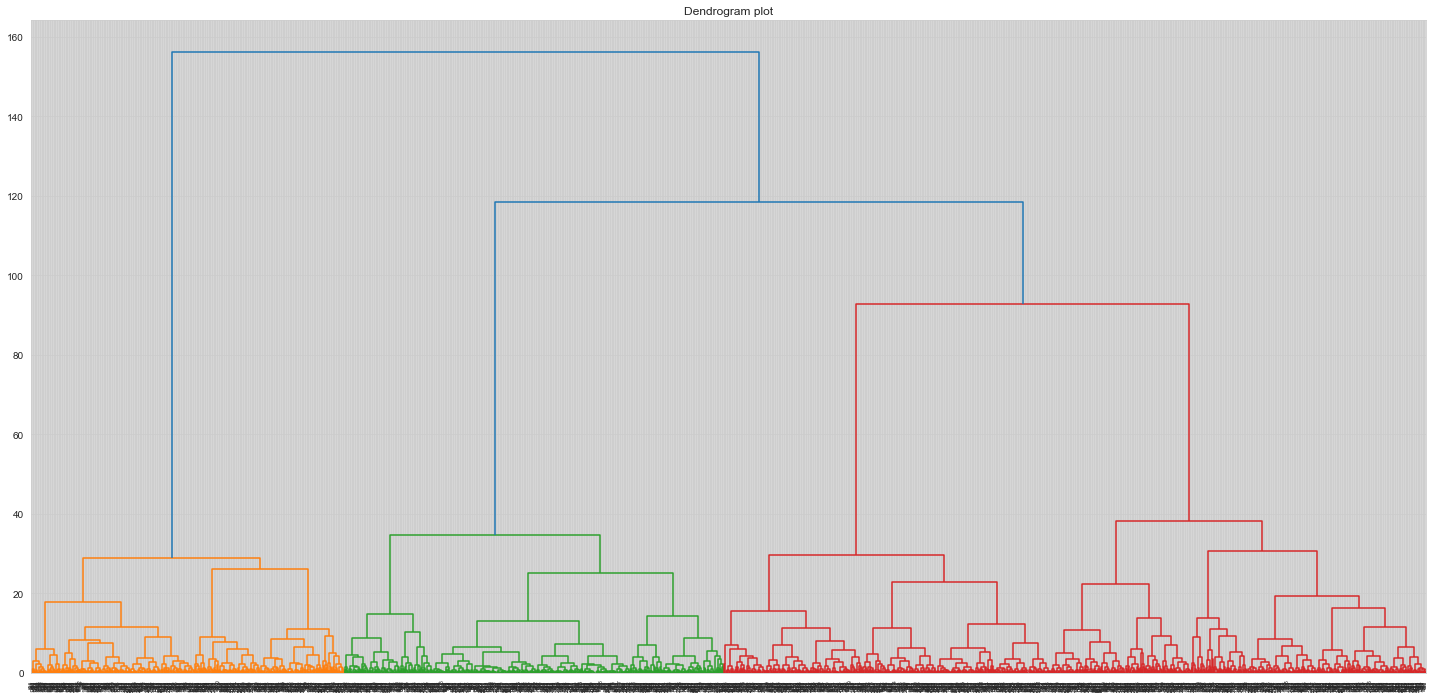

In [57]:
%matplotlib inline
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(pca_df,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [58]:
agg = AgglomerativeClustering(n_clusters=4)
y_pred_agg = agg.fit_predict(pca_df)
pca_df["Clusters_agg"] = y_pred_agg
df["Clusters_agg"]= y_pred_agg

In [59]:
Scene = dict(xaxis = dict(title  = 'Col1'),yaxis = dict(title  = 'Col2'),zaxis = dict(title  = 'Col3'))

trace = go.Scatter3d(x=pca_df['col1'], y=pca_df['col2'], z=pca_df['col3'], mode='markers',marker=dict(color = pca_df["Clusters_agg"], size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/3d_agglomerative.jpg?raw=true)

**Quantities of samples in each cluster.**

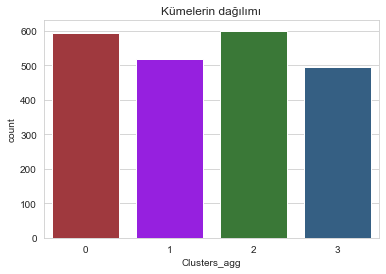

In [60]:
pal = ["#b0282f","#9E00FF", "#30832c","#286090"]
pl = sns.countplot(x=df["Clusters_agg"], palette= pal)
pl.set_title("Kümelerin dağılımı")
plt.show()

**Cluster profile based on income and spent.**

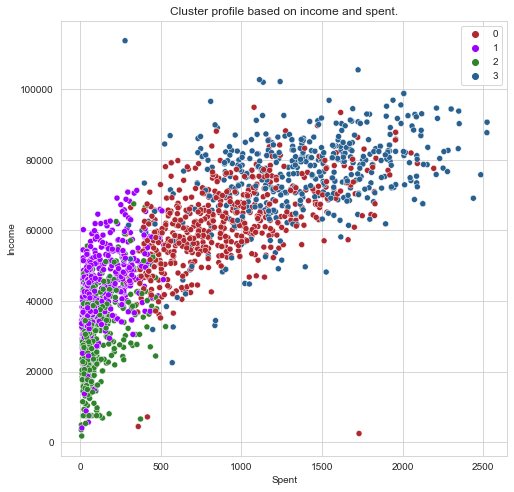

In [61]:
plt.rcParams['figure.figsize'] = [8,8]
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters_agg"], palette= pal)
pl.set_title("Cluster profile based on income and spent.")
plt.legend()
plt.show()

* **Grup 0:** Average income, high spending
* **Grup 1:** Average income, low spending
* **Grup 2:** Low income, low spending.
* **Grup 3:** High income, high spending

## PROFILING

* Determining the qualifications of customers belonging to different clusters.

In [62]:
fig = px.box(df, x=df['Children'], y=df['Spent'], points="all", color="Clusters_agg")
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/children.png?raw=true)

In [63]:
fig = px.box(df, x=df['Family_Size'], y=df['Spent'], points="all", color="Clusters_agg")
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/family_size.png?raw=true)

In [64]:
fig = px.box(df, x=df['Is_Parent'], y=df['Spent'], points="all", color="Clusters_agg")
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/is_parent.png?raw=true)

In [65]:
fig = px.box(df, x=df['Education'], y=df['Spent'], points="all", color="Clusters_agg")
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/education.png?raw=true)

In [66]:
fig = px.box(df, x=df['Living_With'], y=df['Spent'], points="all", color="Clusters_agg")
fig.show()

**The graphic has been added as an image because the Plotly library has a display issue on Github.**
![](https://github.com/emreyesilyurt/customer_segmentation/blob/main/assets/living_with.png?raw=true)